# **6-2 앙상블 모델과 랜덤 포레스트 모델**

### 랜덤 포레스트 모델의 구성  과 작동 원리 이해하기

📌[실습 06-05] 피처와 타깃 지정하기

In [ ]:
import pandas as pd; import matplotlib.pyplot as plt; import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree

df=pd.read_csv("세나무.csv", encoding='cp949')
print(df)
y=df["class"]                 # 타깃
X=df[["x1","x2","x3","x4"]]   # 피처

          x1        x2        x3        x4 class
0   0.374540  0.950714  0.731994  0.598658   Cat
1   0.155995  0.058084  0.866176  0.601115   Dog
2   0.020584  0.969910  0.832443  0.212339   Cat
3   0.183405  0.304242  0.524756  0.431945   Dog
4   0.611853  0.139494  0.292145  0.366362   Dog
..       ...       ...       ...       ...   ...
95  0.992965  0.073797  0.553854  0.969303   Cat
96  0.629399  0.695749  0.454541  0.627558   Cat
97  0.901158  0.045446  0.280963  0.950411   Dog
98  0.455657  0.620133  0.277381  0.188121   Cat
99  0.353352  0.583656  0.077735  0.974395   Dog

[100 rows x 5 columns]


📌[실습 06-06] 부트스트랩 샘플 추출하기

In [ ]:
n = len(y)
n_trees=3
트리=[]
for i in range(n_trees):
    # 부트스트랩 샘플 만들기
    np.random.seed(i)  # 트리마다 고유한 시드
    indices = np.random.choice(n, n, replace=True)
    X_boot = X.iloc[indices,]
    y_boot = y.iloc[indices]

    # 결정 트리 학습
    tree = DecisionTreeClassifier(max_depth=2, max_features=2, random_state=i)
    tree.fit(X_boot, y_boot)
    트리.append(tree)

In [ ]:
트리

[DecisionTreeClassifier(max_depth=2, max_features=2, random_state=0),
 DecisionTreeClassifier(max_depth=2, max_features=2, random_state=1),
 DecisionTreeClassifier(max_depth=2, max_features=2, random_state=2)]

📌[실습 06-07] 학습된 트리 시각화하기

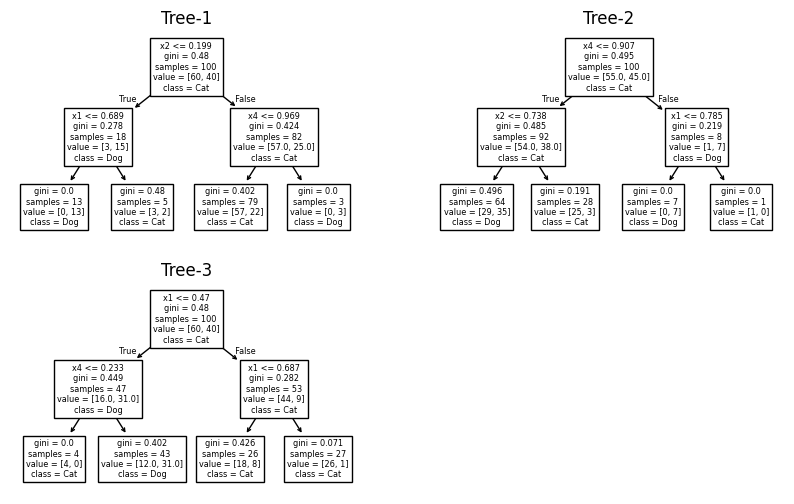

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(n_trees):
    plt.subplot(2, 2, i + 1)
    plot_tree(트리[i], feature_names=X.columns, class_names=['Cat', 'Dog'], filled=False);
    plt.title(f"Tree-{i + 1}")
plt.show()

📌[실습 06-08] 트리별 예측 결과 확인하기

In [ ]:
import warnings; warnings.filterwarnings('ignore')

# 트리별 예측 확인
X_new=np.array([0.8, 0.1, 0.5, 0.8]).reshape(1,-1)
for i in range(n_trees):
  print(f"트리-{i} :==>", 트리[i].predict(X_new))

트리-0 :==> ['Cat']
트리-1 :==> ['Dog']
트리-2 :==> ['Cat']


##랜덤 포레스트 모델 구현 — 회귀 문제   

📌[실습 06-09] 라이브러리 불러오기

In [ ]:
!pip install koreanize_matplotlib  # 패키지 인스톨 필요
import koreanize_matplotlib

import pandas as pd; import numpy as np
import matplotlib.pyplot as plt; import seaborn as sns
from sklearn.ensemble import RandomForestRegressor as RFR  # 랜덤포레스트 회귀 모델
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 58.6 MB/s eta 0:00:00


📌[실습 06-10] 데이터 불러오기

In [ ]:
df=pd.read_csv("바이크_임대.csv", encoding="cp949")
y=df["임대_건수"]
X=df.drop(["임대_건수"], axis=1)    # 임대 건수를 제외하고 모두 피처로 설정
X.head(5)

,월,시간대,기온,습도,풍속,자외선,강우량,강설량
0,01월,1시,-3.2,40,0.5,0.0,0.0,0.0
1,01월,2시,-3.3,41,0.7,0.0,0.0,0.0
2,01월,3시,-3.7,42,0.9,0.0,0.0,0.0
3,01월,4시,-4.0,44,1.0,0.0,0.0,0.0
4,01월,5시,-4.2,53,1.1,0.0,0.0,0.0


📌[실습 06-11] 문자형 피처를 라벨 인코딩하기

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X1=X.copy()  # X 원본을 남기기 위해 다릉 이름으로 설정

for idx in X1.select_dtypes(include=["object"]).columns:
    X1[idx] = le.fit_transform(X1[idx])
X1.head(5)

,월,시간대,기온,습도,풍속,자외선,강우량,강설량
0,0,10,-3.2,40,0.5,0.0,0.0,0.0
1,0,16,-3.3,41,0.7,0.0,0.0,0.0
2,0,17,-3.7,42,0.9,0.0,0.0,0.0
3,0,18,-4.0,44,1.0,0.0,0.0,0.0
4,0,19,-4.2,53,1.1,0.0,0.0,0.0


📌[실습 06-12] 데이터를 분할하고 모델 학습하기

In [ ]:
# 훈련/검증 데이터 분할하기
x_train, x_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# 랜덤포레스트 회귀 모델 학습
앙상블1 = RFR(n_estimators=100,random_state=42)
앙상블1.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

📌[실습 06-13] 예측 결과 확인하기

In [ ]:
y_pred = 앙상블1.predict(x_test)
y_pred

array([145.48, 115.98, 132.37, ..., 139.62, 108.38, 135.95])

📌[실습 06-14] 예측 정확도를 계산하고 시각화하기



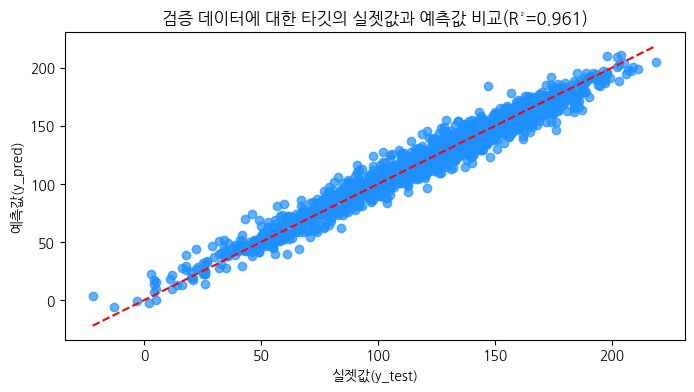

In [ ]:
# 예측 정확도 계산(R-제곱)
r2 = r2_score(y_test, y_pred)
#시각화
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, color='dodgerblue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='45° Line')
plt.title(f'검증 데이터에 대한 타깃의 실젯값과 예측값 비교(R\u00b2={r2:.3f})')
plt.xlabel('실젯값(y_test)')
plt.ylabel('예측값(y_pred)')
plt.show()

📌[실습 06-15] 피처 중요도 계산하기

[0.06008831 0.28112208 0.17679367 0.01967928 0.08108847 0.37772975
 0.00173666 0.00176178]


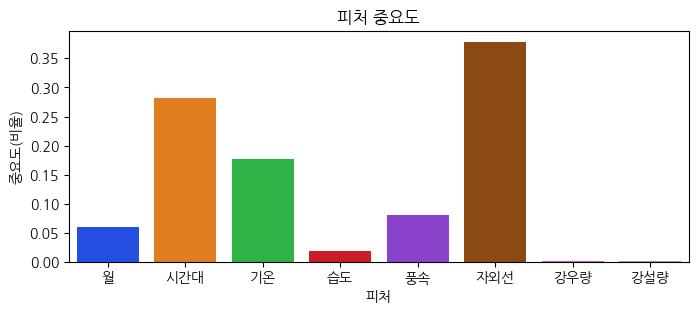

In [ ]:
# 피처 중요도 계산
FI = 앙상블1.feature_importances_
print(FI)

# 피처 중요도 시각화
feature_names = X1.columns
plt.figure(figsize=(8, 3))
sns.barplot(x=feature_names, y=FI, hue=feature_names, palette='bright')
plt.title('피처 중요도'); plt.xlabel('피처'); plt.ylabel('중요도(비율)')
plt.show()

📌[실습 06-16] 피처가 타깃 예측에 미치는 효과 시각화하기 - 1.월

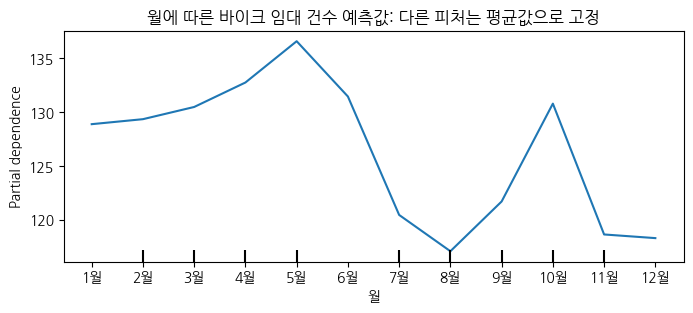

In [ ]:
from sklearn.inspection import PartialDependenceDisplay as PDP

# PDP 시각화
fig, ax = plt.subplots(figsize=(8, 3))
분석_피처="월"
PDP.from_estimator(앙상블1, X1, features=[분석_피처], kind='average', ax=ax)
plt.title(f"{분석_피처}에 따른 바이크 임대 건수 예측값: 다른 피처는 평균값으로 고정")

# X축 눈금 교체 (1~12월 → Jan~Dec)
월_라벨 = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
plt.xticks(ticks=range(0, 12), labels=월_라벨)
plt.show()

📌[실습 06-17] 피처가 타깃 예측에 미치는 효과 시각화하기 - 2.풍속

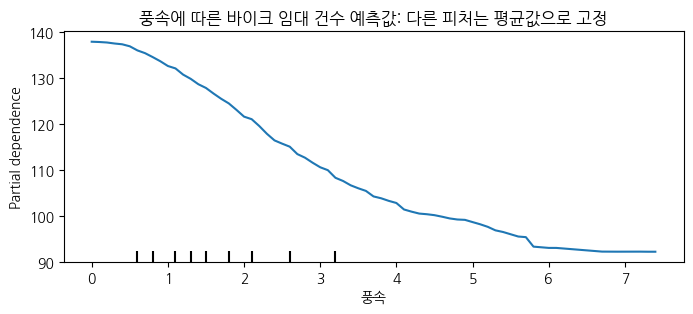

In [ ]:
fig, ax = plt.subplots(figsize=(8, 3))
분석_피처="풍속"
PDP.from_estimator(앙상블1, X1, features=[분석_피처], kind='average', ax=ax)
plt.title(f"{분석_피처}에 따른 바이크 임대 건수 예측값: 다른 피처는 평균값으로 고정")
plt.show()

## 랜덤 포레스트 모델 구현 — 분류 문제  

📌[실습 06-18] 라이브러리 불러오기

In [ ]:
import pandas as pd; import numpy as np ; import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as RFC  # 랜덤포레스트 회귀모형
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

📌[실습 06-19] 데이터 불러오기

In [ ]:
df = pd.read_csv("와인품질.csv", encoding='cp949')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.6,0.645,0.03,1.90,0.086,14.0,57.0,0.99690,3.37,0.46,10.3,Bad
1,8.0,0.250,0.43,1.70,0.067,22.0,50.0,0.99460,3.38,0.60,11.9,Good
2,7.7,0.835,0.00,2.60,0.081,6.0,14.0,0.99750,3.30,0.52,9.3,Bad
3,8.3,0.850,0.14,2.50,0.093,13.0,54.0,0.99724,3.36,0.54,10.1,Bad
4,7.8,0.390,0.42,2.00,0.086,9.0,21.0,0.99526,3.39,0.66,11.6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
795,11.2,0.670,0.55,2.30,0.084,6.0,13.0,1.00000,3.17,0.71,9.5,Bad
796,9.1,0.660,0.15,3.20,0.097,9.0,59.0,0.99976,3.28,0.54,9.6,Bad
797,8.9,0.480,0.24,2.85,0.094,35.0,106.0,0.99820,3.10,0.53,9.2,Bad
798,9.4,0.340,0.37,2.20,0.075,5.0,13.0,0.99800,3.22,0.62,9.2,Bad


📌[실습 06-20] 타깃과 피처 지정하기

In [ ]:
# 타깃을  라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['quality']) # 0=Bad, 1=Good
print(y[:5]); print()
X=df.drop(["quality"], axis=1)  # 타깃 제외한 11개 성분을 피쳐로 지정(모두 숫자형이므로 인코딩 불필요)
print(X[:5])

[0 1 0 0 1]

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.6             0.645         0.03             1.9      0.086   
1            8.0             0.250         0.43             1.7      0.067   
2            7.7             0.835         0.00             2.6      0.081   
3            8.3             0.850         0.14             2.5      0.093   
4            7.8             0.390         0.42             2.0      0.086   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 14.0                  57.0  0.99690  3.37       0.46   
1                 22.0                  50.0  0.99460  3.38       0.60   
2                  6.0                  14.0  0.99750  3.30       0.52   
3                 13.0                  54.0  0.99724  3.36       0.54   
4                  9.0                  21.0  0.99526  3.39       0.66   

   alcohol  
0     10.3  
1     11.9  
2      9.3  
3     10.1  
4     11

📌[실습 06-21] 데이터 분할과 모델 학습하기

In [ ]:
# 학습/검증 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모형 설정과 학습
앙상블2 =  RFC(n_estimators=500, random_state=42)  # 튜닝 가능
앙상블2.fit(x_train, y_train)


RandomForestClassifier(n_estimators=500, random_state=42)

📌[실습 06-22] 예측 결과 확인하기

In [ ]:
y_pred = 앙상블2.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1])

📌[실습 06-23] 클래스별 예측 확률 확인하기

In [ ]:
y_pred_prob = 앙상블2.predict_proba(x_test)  # 각 클래스의 예측 확률 계산
print(y_pred_prob[:10])


[[0.73228571 0.26771429]
 [0.002      0.998     ]
 [0.25706667 0.74293333]
 [0.32       0.68      ]
 [0.994      0.006     ]
 [0.215      0.785     ]
 [0.006      0.994     ]
 [0.136      0.864     ]
 [0.92833333 0.07166667]
 [0.2631     0.7369    ]]


📌예측 정확도 시각화하기

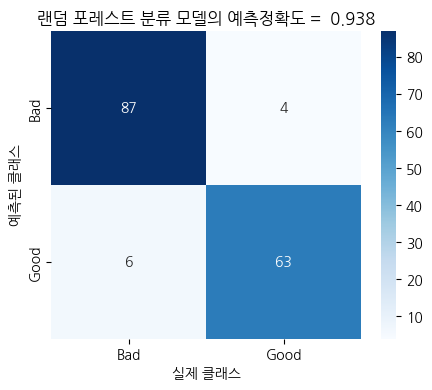

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
class_names=["Bad", "Good"]
cm = pd.crosstab(y_test, y_pred)      # 혼동행렬
acc = accuracy_score(y_test, y_pred)  # 검증용 데이터 분류정확도
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=class_names, yticklabels=class_names)

plt.xlabel("실제 클래스"); plt.ylabel("예측된 클래스")
plt.title(f"랜덤 포레스트 분류 모델의 예측정확도 = {acc: .3f}"); plt.show()


[실습 06-24] 피처 중요도 계산하기

[0.03533916 0.14595769 0.04576712 0.02520207 0.04366547 0.03417241
 0.07110486 0.1121425  0.03611446 0.07460075 0.3759335 ]


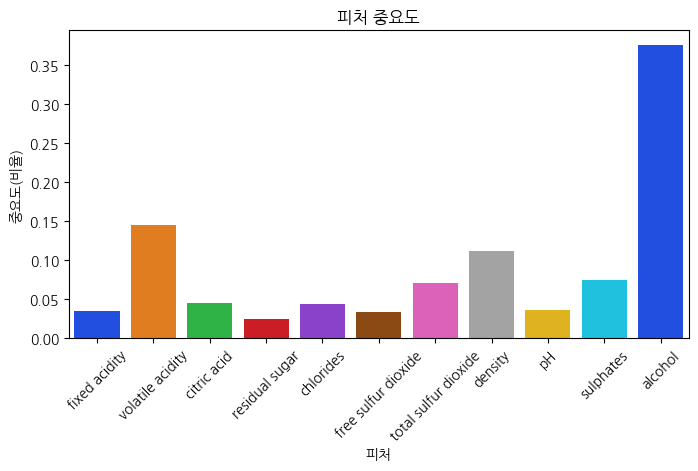

In [ ]:
FI = 앙상블2.feature_importances_
print(FI)  # 출력

feature_names = X.columns
plt.figure(figsize=(8, 4))
sns.barplot(x=feature_names, y=FI, hue=feature_names, palette='bright')
plt.title('피처 중요도')
plt.xlabel('피처'); plt.ylabel('중요도(비율)')
plt.xticks(rotation=45); plt.show()

📌[실습 06-25] 피처가 타깃 예측에 미치는 효과 시각화하기 - 1.알코올 도수

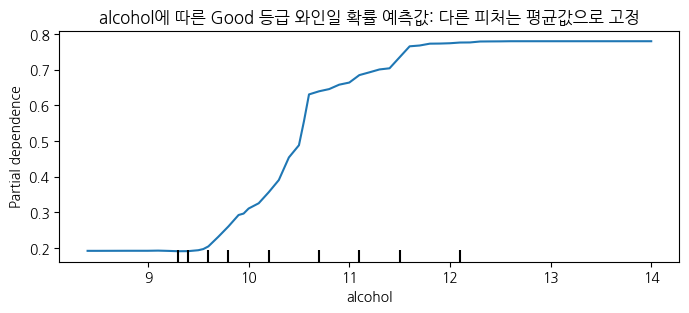

In [ ]:
from sklearn.inspection import PartialDependenceDisplay as PDP

fig, ax = plt.subplots(figsize=(8, 3))
분석_피처="alcohol"
PDP.from_estimator(앙상블2, X, features=[분석_피처], kind='average',  ax=ax)
plt.title(f"{분석_피처}에 따른 Good 등급 와인일 확률 예측값: 다른 피처는 평균값으로 고정")
plt.show()


📌[실습 06-26] 피처가 타깃 예측에 미치는 효과 시각화하기 - 2.밀도

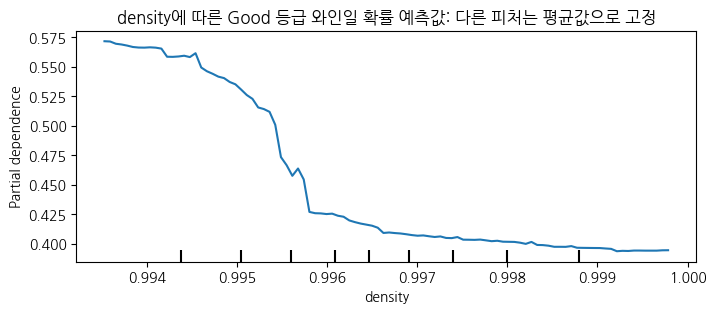

In [ ]:
# PDP 시각화
fig, ax = plt.subplots(figsize=(8, 3))
분석_피처="density"
PDP.from_estimator(앙상블2, X, features=[분석_피처], kind='average', ax=ax)
plt.title(f"{분석_피처}에 따른 Good 등급 와인일 확률 예측값: 다른 피처는 평균값으로 고정")
plt.show()